In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('data_cleaned.csv')

In [4]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [54]:
from sklearn.model_selection import train_test_split as tt
train_x,val_x,train_y,val_y=tt(x,y,stratify=y,random_state=54)

ValueError: Found input variables with inconsistent numbers of samples: [223, 891]

In [8]:
dd=DecisionTreeClassifier()

In [10]:
dd.fit(train_x,train_y)
dd.score(train_x,train_y)

0.9850299401197605

In [13]:
predict=dd.predict(val_x)
dd.score(val_x,val_y)


0.7623318385650224

In [15]:
predict

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [18]:
predict=dd.predict_proba(val_x)
predict

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.

In [39]:
x=[]
predict_x=predict[:,0]
for i in range(len(predict_x)):
    if predict_x[i]>=0.4:
        x.append(0)
    else:
        x.append(1)



In [41]:
from sklearn.metrics import accuracy_score as ac
ac(x,val_y)

0.7623318385650224

In [44]:
train=[]
test=[]
for i in range(1,10):
    dd=DecisionTreeClassifier(max_depth=i)
    dd.fit(train_x,train_y)
    train.append(dd.score(train_x,train_y))
    test.append(dd.score(val_x,val_y))


In [46]:
df_t=pd.DataFrame({'max_depth':range(1,10),'traning_score':train,'val_score':test})
df_t

,max_depth,traning_score,val_score
0,1,0.781437,0.802691
1,2,0.811377,0.748879
2,3,0.824850,0.816143
3,4,0.838323,0.793722
4,5,0.859281,0.798206
5,6,0.880240,0.807175
6,7,0.898204,0.825112
7,8,0.907186,0.829596
8,9,0.934132,0.798206


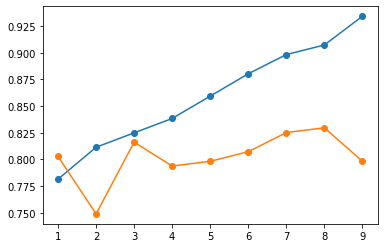

In [56]:
plt.plot(df_t['max_depth'],df_t['traning_score'],marker='o')
plt.plot(df_t['max_depth'],df_t['val_score'],marker='o')

In [62]:
dd=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=30)
dd.fit(train_x,train_y)
dd.score(train_x,train_y)

0.8248502994011976

In [63]:
dd.score(val_x,val_y)

0.8161434977578476

In [3]:
df=pd.read_csv('train_bm.csv')

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

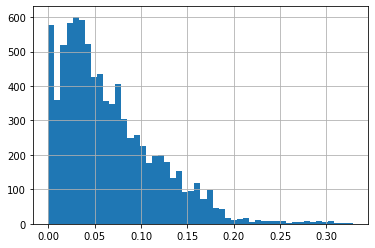

In [6]:
df['Item_Visibility'].hist(bins=50)

In [29]:
x=np.log(df['Item_Visibility']+1)
x.describe()

count    8523.000000
mean        0.062904
std         0.047218
min         0.000000
25%         0.026632
50%         0.052527
75%         0.090376
max         0.283968
Name: Item_Visibility, dtype: float64

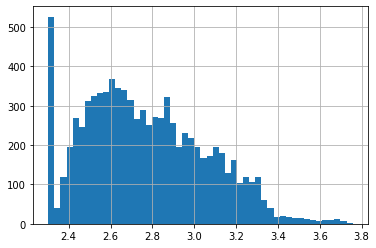

In [32]:
x=df['Item_Visibility']*100
c=np.log(x+10)
c.hist(bins=50)

In [94]:
df=pd.read_csv('train_bm.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [59]:
df.nunique(),df.shape

(Item_Identifier              1559
 Item_Weight                   415
 Item_Fat_Content                5
 Item_Visibility              7880
 Item_Type                      16
 Item_MRP                     5938
 Outlet_Identifier              10
 Outlet_Establishment_Year       9
 Outlet_Size                     3
 Outlet_Location_Type            3
 Outlet_Type                     4
 Item_Outlet_Sales            3493
 dtype: int64,
 (8523, 12))

In [51]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
df['Outlet_Size']=df['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [55]:
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [60]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()

In [62]:
ll.fit_transform(['Small','Medium','High'])

array([2, 1, 0], dtype=int64)

In [98]:
c=df['Item_Identifier'].value_counts()
c

FDG33    10
FDW13    10
NCF42     9
FDU12     9
FDD38     9
         ..
FDN52     1
FDC23     1
FDQ60     1
FDE52     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [99]:
df['item_identifier_counts']=df['Item_Identifier'].apply(lambda x:c[x])

In [103]:

for i in range(len(df['item_identifier_counts'])):
    if df['item_identifier_counts'][i]<4:
        df['Item_Identifier'][i]='low fre'
df['Item_Identifier'].value_counts()

low fre    418
FDW13       10
FDG33       10
DRN47        9
NCI54        9
          ... 
DRM48        4
FDA16        4
FDJ12        4
FDO49        4
FDX12        4
Name: Item_Identifier, Length: 1403, dtype: int64

In [109]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [111]:
df=pd.read_csv('stroke prediction.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [113]:
bins=[0,10,20,40,60,100]
group=['child','young','adults','matured','old']

In [121]:
df['age_ver']=pd.cut(df['age'],bins,labels=group)

In [123]:
df['age_ver']

0          child
1        matured
2          child
3            old
4          young
          ...   
43395      child
43396    matured
43397        old
43398     adults
43399        old
Name: age_ver, Length: 43400, dtype: category
Categories (5, object): [child < young < adults < matured < old]

In [128]:
df['Missing']=df['smoking_status'].isnull()*1
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_ver,Missing
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,child,1
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,matured,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,child,1
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,old,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,young,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,child,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,matured,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,old,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,adults,0


In [130]:
df=pd.read_csv('No2 dataset.csv')
df.head()

,Date_Time,NO2(GT)
0,10/03/2004 18.00.00,166
1,10/03/2004 19.00.00,1174
2,10/03/2004 20.00.00,131
3,10/03/2004 21.00.00,172
4,10/03/2004 22.00.00,131


In [135]:
df['Date_Time']=pd.to_datetime(df['Date_Time'],format='%d/%m/%Y %H.%M.%S')


In [141]:
df['week']=df['Date_Time'].dt.week
df

,Date_Time,NO2(GT),week,year
0,2004-03-10 18:00:00,166,11,2004
1,2004-03-10 19:00:00,1174,11,2004
2,2004-03-10 20:00:00,131,11,2004
3,2004-03-10 21:00:00,172,11,2004
4,2004-03-10 22:00:00,131,11,2004
...,...,...,...,...
4732,2004-09-23 22:00:00,218,39,2004
4733,2004-09-23 23:00:00,179,39,2004
4734,2004-09-24 00:00:00,859,39,2004
4735,2004-09-24 01:00:00,83,39,2004


In [142]:
df['year']=df['Date_Time'].dt.year

In [145]:
df['month']=df['Date_Time'].dt.month
df

,Date_Time,NO2(GT),week,year,month
0,2004-03-10 18:00:00,166,11,2004,3
1,2004-03-10 19:00:00,1174,11,2004,3
2,2004-03-10 20:00:00,131,11,2004,3
3,2004-03-10 21:00:00,172,11,2004,3
4,2004-03-10 22:00:00,131,11,2004,3
...,...,...,...,...,...
4732,2004-09-23 22:00:00,218,39,2004,9
4733,2004-09-23 23:00:00,179,39,2004,9
4734,2004-09-24 00:00:00,859,39,2004,9
4735,2004-09-24 01:00:00,83,39,2004,9


In [150]:
df['weekday']=df['Date_Time'].dt.dayofweek
df

,Date_Time,NO2(GT),week,year,month,weekday
0,2004-03-10 18:00:00,166,11,2004,3,2
1,2004-03-10 19:00:00,1174,11,2004,3,2
2,2004-03-10 20:00:00,131,11,2004,3,2
3,2004-03-10 21:00:00,172,11,2004,3,2
4,2004-03-10 22:00:00,131,11,2004,3,2
...,...,...,...,...,...,...
4732,2004-09-23 22:00:00,218,39,2004,9,3
4733,2004-09-23 23:00:00,179,39,2004,9,3
4734,2004-09-24 00:00:00,859,39,2004,9,4
4735,2004-09-24 01:00:00,83,39,2004,9,4


In [153]:
df['dayofyear']=df['Date_Time'].dt.dayofyear
df

,Date_Time,NO2(GT),week,year,month,weekday,dayofyear
0,2004-03-10 18:00:00,166,11,2004,3,2,70
1,2004-03-10 19:00:00,1174,11,2004,3,2,70
2,2004-03-10 20:00:00,131,11,2004,3,2,70
3,2004-03-10 21:00:00,172,11,2004,3,2,70
4,2004-03-10 22:00:00,131,11,2004,3,2,70
...,...,...,...,...,...,...,...
4732,2004-09-23 22:00:00,218,39,2004,9,3,267
4733,2004-09-23 23:00:00,179,39,2004,9,3,267
4734,2004-09-24 00:00:00,859,39,2004,9,4,268
4735,2004-09-24 01:00:00,83,39,2004,9,4,268


In [160]:
df['weekname']=df['Date_Time'].dt.weekday_name
df

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'